In [1]:
#	№    For copying
import os
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
# dfs = {}
# for case_study in case_studies:
#     these_dfs = {
#         model:pd.read_excel(
#             os.path.join("Case Studies",case_study,f"{case_study}.xlsx"),
#             sheet_name=model,
#             nrows=51, #Header (1) + Data (50)
#             header=[1,2] if case_study in ['Career Development','Family Health'] else [1]
#         )
#         for model in models
#     }
    
#     for df in these_dfs.values():
#         df.columns = [
#             ' '.join(map(str,[    
#                 item for item in [(col,),col][type(col) is tuple] #Ensure col is a tuple
#                 if 'unnamed' not in str(item).lower() #Remove unnamed columns
#             ])).strip()
#             for col in df.columns
#         ]
#         df['Batch'] = df['Batch'].ffill().astype(int)
        
#     these_dfs = {df_i:df.drop(columns=[''], errors='ignore') for df_i,df in these_dfs.items()}
#     dfs[case_study] = these_dfs

# for case_study in dfs:
#     for model_df in dfs[case_study]:
#         dfs[case_study][model_df].to_csv(os.path.join("Case Studies",case_study,f"{model_df}.csv"),index=False)

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}


In [ ]:
from country_helper import CountryHelper

df = pd.concat([dfs['Financial Literacy'][model] for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].str\
    .replace('USA'     ,'United States of America')\
    .replace('US'      ,'United States of America') \
    .replace('UK'     ,'United Kingdom')             \
    .replace('Britian','United Kingdom')              \
    .replace('UAE'    ,'United Arab Emirates')         \

countryHelper = CountryHelper()

df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)

#TODO: Make a custom .value_counts() function that if country of origin is more than one, than '1' isnt added to all countries, but that '1' is split across the different countries


TypeError: unhashable type: 'list'

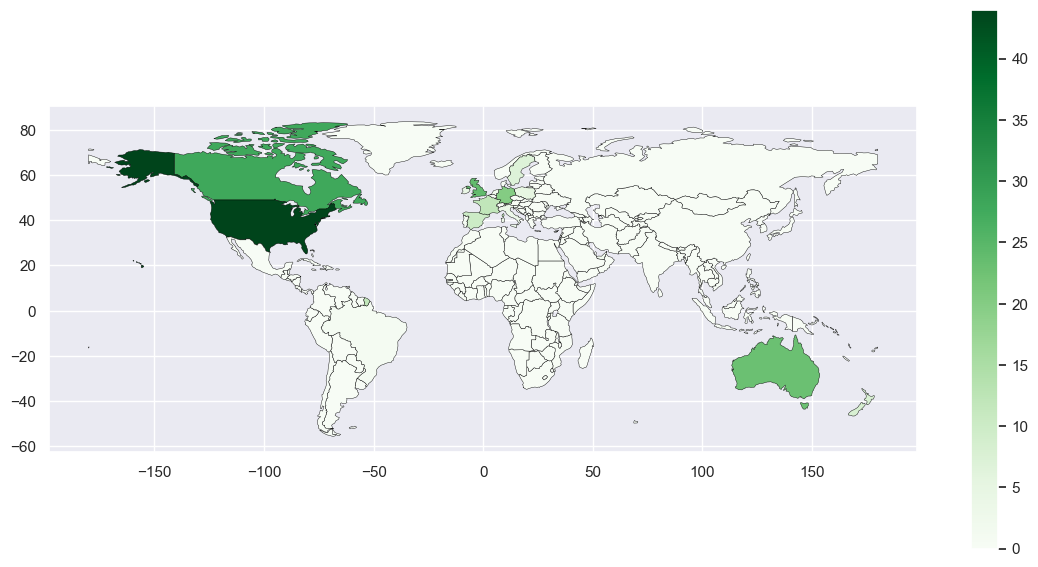

In [7]:
world = gpd.read_file(os.path.join("world_data","ne_110m_admin_0_countries_lakes.shp"))
world = world[(world.NAME!="Antarctica")]

world = world.merge(
    df['Country of Residence'].value_counts().reset_index(),
    how='left',left_on='NAME',right_on='Country of Residence'
)
world['count'] = world['count'].fillna(0)

sns.set_theme(rc={'figure.figsize':(14,7)})
fig, ax = plt.subplots(1, 1)

world.boundary.plot(ax=ax, linewidth=0)
world.plot(column='count', cmap='Greens', linewidth=0.3, edgecolor='black', legend=True, ax=ax)

world = world.merge(
    df['Country of Origin'].value_counts().reset_index(),
    how='left',left_on='NAME',right_on='Country of Origin'
)
world['count'] = world['count'].fillna(0)
world.plot(column='count', cmap='Reds', linewidth=0.3, edgecolor='black', legend=True, ax=ax)



ax.set_facecolor('#A6CAE0')
ax.set_title('Country Frequency Visualization', fontsize=14)
ax.set_aspect(1.5) 
ax.set_xticks([])
ax.set_yticks([])
# ax.set_frame_on(False)
plt.show()
